[View in Colaboratory](https://colab.research.google.com/github/nishi1612/SC374-Computational-and-Numerical-Methods/blob/master/Set_4.ipynb)

Set 4
---



**Finding roots of polynomial by Newton Raphson Method**

In [43]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
from pandas.plotting import table 
import math

In [2]:
def iterations(arr1, arr2 , i):
    plt.plot(range(len(arr2)),arr2);
    plt.xlabel('No. of iterations')
    plt.ylabel('Value of x')
    plt.grid(True)
    plt.plot(range(len(arr1)),arr1)
    plt.savefig("Iterations" + str(i) + ".png")
    plt.show()

In [4]:
def function(x,k):
    if k==1:
        return x**6 - x - 1;
    elif k==2:
        return x**3 - x**2 - x - 1;
    elif k==3:
        return x - 1 - 0.3*math.cos(x);
    elif k==4:
        return 0.5 + math.sin(x) - math.cos(x);
    elif k==5:
        return x - math.e**(-x);
    elif k==6:
        return math.e**(-x) - math.sin(x);
    elif k==7:
        return x**3 - 2*x - 2;
    elif k==8:
        return x**4 - x - 1;
    elif k==9:
        return math.e**(x) - x - 2;
    elif k==10:
        return (1 - x + math.sin(x));
    elif k==11:
        return x - math.tan(x);
    elif k==12:
        return x - x**2;
    elif k==13:
        return x**2 - x;

In [5]:
def derivative(x,k):
    if k==1:
        return 6*x**5 - 1;
    elif k==2:
        return 3*x**2 - 2*x - 1;
    elif k==3:
        return 1 + 0.3*math.sin(x);
    elif k==4:
        return math.cos(x) + math.sin(x);
    elif k==5:
        return 1 + math.e**(-x);
    elif k==6:
        return -1*math.e**(-x) - math.cos(x);
    elif k==7:
        return 3*x**2 - 2;
    elif k==8:
        return 4*x**3 - 1;
    elif k==9:
        return math.e**(x) - 1;
    elif k==10:
        return -1 + math.cos(x);
    elif k==11:
        return 1 - (1/math.cos(x)**2);
    elif k==12:
        return 1 - 2*x;
    elif k==13:
        return 2*x - 1;

In [47]:
def newton_raphson(initial_value,epsilon,k):
    table = pd.DataFrame(columns=['x(n)','f(x(n))','f\'(x(n))','x(n+1)','x(n+1)-x(n)'])
    i = 0
    func = function(initial_value,k)
    der = derivative(initial_value,k)
    new_value = initial_value - (func/der);
    table.loc[i] = [initial_value,func,der,new_value,new_value-initial_value]
    i=i+1;
    arr = []
    arr.append(initial_value)
    while(True):
        if(abs(np.around(new_value, 4) - np.around(initial_value, 4)) == 0):
            break
        if(k==5 and (abs(np.around(new_value,4)-np.around(initial_value,4)) < epsilon)):
            break
        initial_value = new_value
        func = function(initial_value,k)
        der = derivative(initial_value,k)
        new_value = initial_value - (func/der);
        table.loc[i] = [initial_value,func,der,new_value,new_value-initial_value]
        arr.append(initial_value)
        i=i+1;
    func = function(initial_value,k)
    der = derivative(initial_value,k)
    table.loc[i] = [initial_value,func,der,new_value,new_value-initial_value]
    arr.append(initial_value)
    i=i+1;
    return table , arr , new_value

In [7]:
def bisection(a,b,epsilon,k):
    table = pd.DataFrame(columns=['a','b','c','b-c','f(a)*f(c)','Assign'])
    c = (a+b)/2;
    dist = b-c;
    i = 0
    arr = []
    while(dist>epsilon):
        ans_a = function(a,k);
        ans_b = function(b,k);
        ans_c = function(c,k);
        ans = ""
        if(ans_a*ans_c < 0):
            b=c;
            ans = "b=c"
        else:
            a=c;
            ans = "a=c";
        table.loc[i] = [a,b,c,dist,ans_a*ans_c,ans]
        arr.append(c)
        i = i+1
        c = (a+b) / 2
        dist = b-c 
    return (a+b)/2 ,i , arr , table;

       x(n)       f(x(n))   f'(x(n))    x(n+1)   x(n+1)-x(n)
0  1.500000  8.890625e+00  44.562500  1.300491 -1.995091e-01
1  1.300491  2.537264e+00  21.319672  1.181480 -1.190105e-01
2  1.181480  5.384586e-01  12.812869  1.139456 -4.202483e-02
3  1.139456  4.923525e-02  10.524929  1.134778 -4.677965e-03
4  1.134778  5.503239e-04  10.290289  1.134724 -5.347992e-05
5  1.134724  7.113585e-08  10.287629  1.134724 -6.914698e-09
6  1.134724  7.113585e-08  10.287629  1.134724 -6.914698e-09


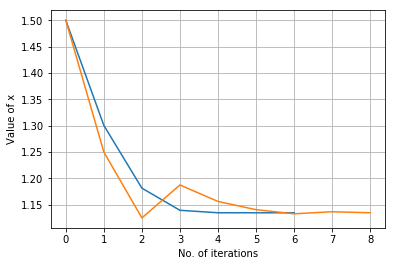

       x(n)    f(x(n))   f'(x(n))    x(n+1)  x(n+1)-x(n)
0 -1.500000  11.890625 -46.562500 -1.244631     0.255369
1 -1.244631   3.962066 -18.920664 -1.035227     0.209404
2 -1.035227   1.266098  -8.133925 -0.879570     0.155656
3 -0.879570   0.342615  -4.158666 -0.797184     0.082386
4 -0.797184   0.053841  -2.931725 -0.778819     0.018365
5 -0.778819   0.001982  -2.719234 -0.778091     0.000729
6 -0.778091   0.000003  -2.711206 -0.778090     0.000001
7 -0.778091   0.000003  -2.711206 -0.778090     0.000001


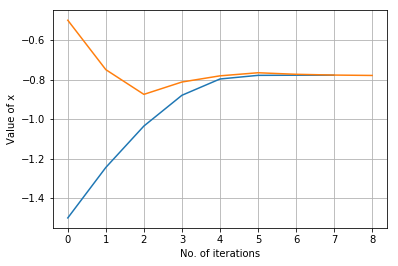

In [58]:
table , arr2 , answer = newton_raphson(1.5,0.0001,1)
print(table)
a, n, arr1, table = bisection(1,2,0.001,1)
iterations(arr1,arr2,'1_1')


table, arr2, answer = newton_raphson(-1.5,0.0001,1)
print(table)
a, n, arr1, table = bisection(-1,0,0.001,1)
iterations(arr1,arr2,'1_2')

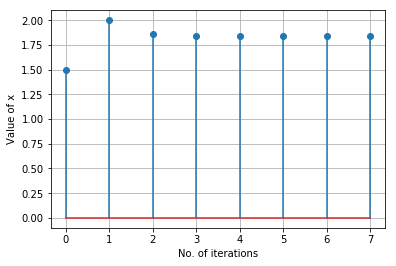

1.8392867552141612


,x(n),f(x(n)),f'(x(n)),x(n+1),x(n+1)-x(n)
0,1.500000,-1.375000e+00,2.750000,2.000000,5.000000e-01
1,2.000000,1.000000e+00,7.000000,1.857143,-1.428571e-01
2,1.857143,9.912536e-02,5.632653,1.839545,-1.759834e-02
3,1.839545,1.410329e-03,5.472683,1.839287,-2.577034e-04
4,1.839287,3.000700e-07,5.470354,1.839287,-5.485386e-08
5,1.839287,1.376677e-14,5.470354,1.839287,-2.442491e-15
6,1.839287,2.220446e-16,5.470354,1.839287,0.000000e+00
7,1.839287,2.220446e-16,5.470354,1.839287,0.000000e+00


In [12]:
table , arr , answer = newton_raphson(1.5,0.0001,2)
iterations(arr,2)
print(answer)
table

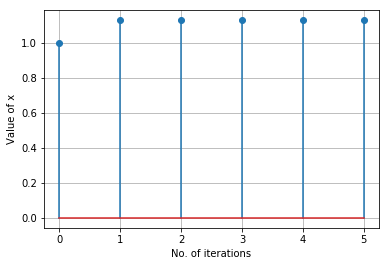

1.1284250929922246


,x(n),f(x(n)),f'(x(n)),x(n+1),x(n+1)-x(n)
0,1.000000,-1.620907e-01,1.252441,1.129420,1.294198e-01
1,1.129420,1.264447e-03,1.271249,1.128425,-9.946490e-04
2,1.128425,6.343822e-08,1.271122,1.128425,-4.990728e-08
3,1.128425,2.498002e-16,1.271122,1.128425,-2.220446e-16
4,1.128425,-2.775558e-17,1.271122,1.128425,0.000000e+00
5,1.128425,-2.775558e-17,1.271122,1.128425,0.000000e+00


In [13]:
table , arr , answer = newton_raphson(1,0.0001,3)
iterations(arr,3)
print(answer)
table

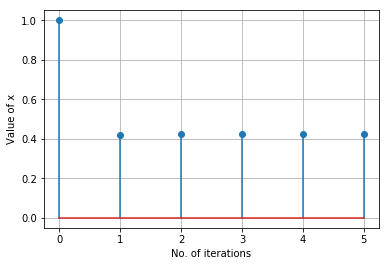

0.4240310394907405


,x(n),f(x(n)),f'(x(n)),x(n+1),x(n+1)-x(n)
0,1.000000,8.011687e-01,1.381773,0.420188,-5.798120e-01
1,0.420188,-5.080105e-03,1.320944,0.424034,3.845813e-03
2,0.424034,3.722610e-06,1.322877,0.424031,-2.814026e-06
3,0.424031,1.979750e-12,1.322876,0.424031,-1.496525e-12
4,0.424031,0.000000e+00,1.322876,0.424031,0.000000e+00
5,0.424031,0.000000e+00,1.322876,0.424031,0.000000e+00


In [14]:
table , arr , answer = newton_raphson(1,0.0001,4)
iterations(arr,4)
print(answer)
table

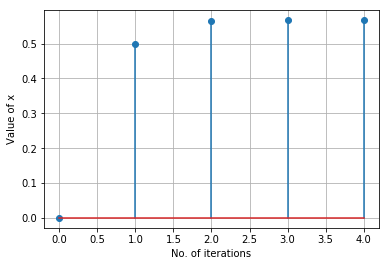

0.5671432904097811


,x(n),f(x(n)),f'(x(n)),x(n+1),x(n+1)-x(n)
0,0.000000,-1.000000e+00,2.000000,0.500000,5.000000e-01
1,0.500000,-1.065307e-01,1.606531,0.566311,6.631100e-02
2,0.566311,-1.304510e-03,1.567616,0.567143,8.321618e-04
3,0.567143,-1.964805e-07,1.567143,0.567143,1.253749e-07
4,0.567143,-1.964805e-07,1.567143,0.567143,1.253749e-07


In [15]:
table , arr , answer = newton_raphson(0,0.0001,5)
iterations(arr,5)
print(answer)
table

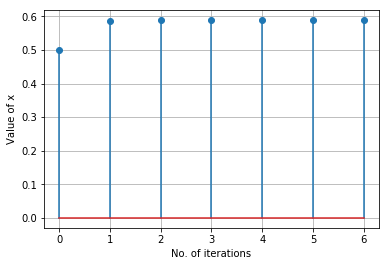

0.5885327439818611


,x(n),f(x(n)),f'(x(n)),x(n+1),x(n+1)-x(n)
0,0.500000,1.271051e-01,-1.484113,0.585644,8.564382e-02
1,0.585644,4.011277e-03,-1.390104,0.588529,2.885596e-03
2,0.588529,4.620254e-06,-1.386901,0.588533,3.331351e-06
3,0.588533,6.160850e-12,-1.386897,0.588533,4.442224e-12
4,0.588533,-1.110223e-16,-1.386897,0.588533,-1.110223e-16
5,0.588533,0.000000e+00,-1.386897,0.588533,0.000000e+00
6,0.588533,0.000000e+00,-1.386897,0.588533,0.000000e+00


In [16]:
table , arr , answer = newton_raphson(0.5,0.0001,6)
iterations(arr,6)
print(answer)
table

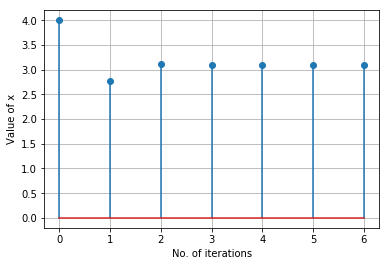

3.0963639324106462


,x(n),f(x(n)),f'(x(n)),x(n+1),x(n+1)-x(n)
0,4.000000,7.751181e-01,0.635328,2.779972,-1.220028e+00
1,2.779972,-2.917506e-01,0.873284,3.114056,3.340843e-01
2,3.114056,1.688722e-02,0.955200,3.096377,-1.767924e-02
3,3.096377,1.220633e-05,0.953765,3.096364,-1.279804e-05
4,3.096364,7.404730e-12,0.953764,3.096364,-7.763568e-12
5,3.096364,1.110223e-16,0.953764,3.096364,0.000000e+00
6,3.096364,1.110223e-16,0.953764,3.096364,0.000000e+00


In [17]:
table , arr , answer = newton_raphson(4,0.0001,6)
iterations(arr,6)
print(answer)
table

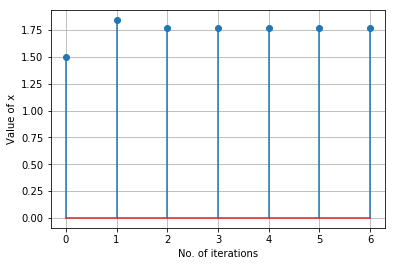

1.7692923542386314


,x(n),f(x(n)),f'(x(n)),x(n+1),x(n+1)-x(n)
0,1.500000,-1.625000e+00,4.750000,1.842105,3.421053e-01
1,1.842105,5.667007e-01,8.180055,1.772827,-6.927834e-02
2,1.772827,2.619099e-02,7.428746,1.769301,-3.525627e-03
3,1.769301,6.606515e-05,7.391281,1.769292,-8.938254e-06
4,1.769292,4.240612e-10,7.391186,1.769292,-5.737388e-11
5,1.769292,0.000000e+00,7.391186,1.769292,0.000000e+00
6,1.769292,0.000000e+00,7.391186,1.769292,0.000000e+00


In [18]:
table , arr , answer = newton_raphson(1.5,0.0001,7)
iterations(arr,7)
print(answer)
table

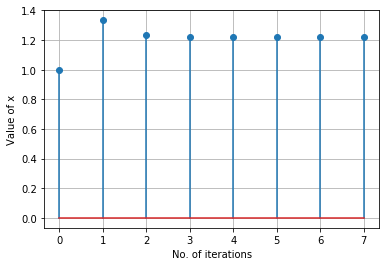

1.2207440846057596


,x(n),f(x(n)),f'(x(n)),x(n+1),x(n+1)-x(n)
0,1.000000,-1.000000e+00,3.000000,1.333333,3.333333e-01
1,1.333333,8.271605e-01,8.481481,1.235808,-9.752547e-02
2,1.235808,9.659633e-02,6.549407,1.221059,-1.474887e-02
3,1.221059,1.977478e-03,6.282323,1.220744,-3.147685e-04
4,1.220744,8.862016e-07,6.276693,1.220744,-1.411893e-07
5,1.220744,1.789680e-13,6.276690,1.220744,-2.842171e-14
6,1.220744,4.440892e-16,6.276690,1.220744,0.000000e+00
7,1.220744,4.440892e-16,6.276690,1.220744,0.000000e+00


In [19]:
table , arr , answer = newton_raphson(1,0.0001,8)
iterations(arr,8)
print(answer)
table

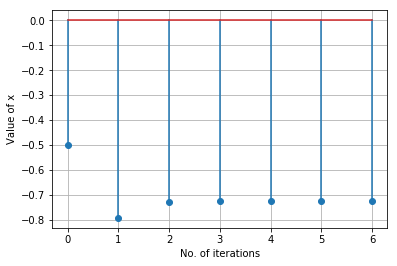

-0.7244919590005157


,x(n),f(x(n)),f'(x(n)),x(n+1),x(n+1)-x(n)
0,-0.500000,-4.375000e-01,-1.500000,-0.791667,-2.916667e-01
1,-0.791667,1.844648e-01,-2.984664,-0.729862,6.180421e-02
2,-0.729862,1.363090e-02,-2.555189,-0.724528,5.334597e-03
3,-0.724528,9.051470e-05,-2.521336,-0.724492,3.589950e-05
4,-0.724492,4.059044e-09,-2.521110,-0.724492,1.610022e-09
5,-0.724492,0.000000e+00,-2.521110,-0.724492,0.000000e+00
6,-0.724492,0.000000e+00,-2.521110,-0.724492,0.000000e+00


In [20]:
table , arr , answer = newton_raphson(-0.5,0.0001,8)
iterations(arr,8)
print(answer)
table

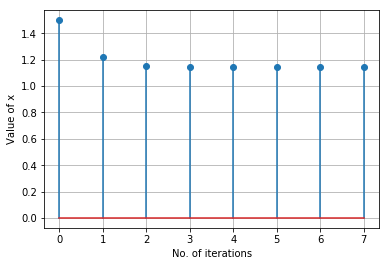

1.1461932206205827


,x(n),f(x(n)),f'(x(n)),x(n+1),x(n+1)-x(n)
0,1.500000,9.816891e-01,3.481689,1.218042,-2.819577e-01
1,1.218042,1.625208e-01,2.380563,1.149772,-6.826990e-02
2,1.149772,7.701770e-03,2.157474,1.146203,-3.569809e-03
3,1.146203,2.009477e-05,2.146223,1.146193,-9.362855e-06
4,1.146193,1.379030e-10,2.146193,1.146193,-6.425460e-11
5,1.146193,4.440892e-16,2.146193,1.146193,-2.220446e-16
6,1.146193,0.000000e+00,2.146193,1.146193,0.000000e+00
7,1.146193,0.000000e+00,2.146193,1.146193,0.000000e+00


In [21]:
table , arr , answer = newton_raphson(1.5,0.0001,9)
iterations(arr,9)
print(answer)
table

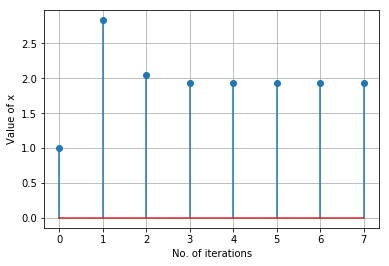

1.9345632107520243


,x(n),f(x(n)),f'(x(n)),x(n+1),x(n+1)-x(n)
0,1.000000,8.414710e-01,-0.459698,2.830488,1.830488e+00
1,2.830488,-1.524377e+00,-1.951996,2.049555,-7.809325e-01
2,2.049555,-1.619879e-01,-1.460678,1.938656,-1.108991e-01
3,1.938656,-5.556989e-03,-1.359619,1.934569,-4.087165e-03
4,1.934569,-7.797755e-06,-1.355803,1.934563,-5.751394e-06
5,1.934563,-1.545708e-11,-1.355797,1.934563,-1.140066e-11
6,1.934563,0.000000e+00,-1.355797,1.934563,0.000000e+00
7,1.934563,0.000000e+00,-1.355797,1.934563,0.000000e+00


In [22]:
table , arr , answer = newton_raphson(1,0.0001,10)
iterations(arr,10)
print(answer)
table

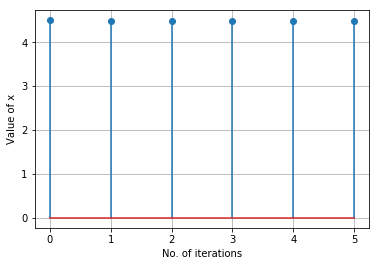

4.493409457909064


,x(n),f(x(n)),f'(x(n)),x(n+1),x(n+1)-x(n)
0,4.500000,-1.373321e-01,-21.504849,4.493614,-6.386097e-03
1,4.493614,-4.131874e-03,-20.229717,4.493410,-2.042477e-04
2,4.493410,-3.979681e-06,-20.190766,4.493409,-1.971040e-07
3,4.493409,-3.694822e-12,-20.190729,4.493409,-1.829648e-13
4,4.493409,-8.881784e-16,-20.190729,4.493409,0.000000e+00
5,4.493409,-8.881784e-16,-20.190729,4.493409,0.000000e+00


In [23]:
table , arr , answer = newton_raphson(4.5,0.0001,11)
iterations(arr,11)
print(answer)
table

In [9]:
def iterations(arr, i):
    plt.plot(range(len(arr)),arr);
    plt.xlabel('No. of iterations')
    plt.ylabel('Value of x')
    plt.grid(True)
    plt.savefig("Iterations" + str(i) + ".png")
    plt.show()

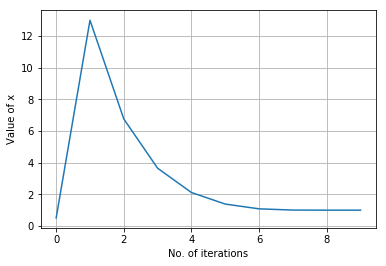

1.0000000012719288


,x(n),f(x(n)),f'(x(n)),x(n+1),x(n+1)-x(n)
0,0.510000,0.249900,-0.020000,13.005000,12.495000
1,13.005000,-156.125025,-25.010000,6.762496,-6.242504
2,6.762496,-38.968856,-12.524992,3.651208,-3.111288
3,3.651208,-9.680112,-6.302416,2.115271,-1.535937
4,2.115271,-2.359102,-3.230543,1.385022,-0.730249
5,1.385022,-0.533264,-1.770044,1.083750,-0.301272
6,1.083750,-0.090765,-1.167501,1.006008,-0.077743
7,1.006008,-0.006044,-1.012016,1.000036,-0.005972
8,1.000036,-0.000036,-1.000071,1.000000,-0.000036
9,1.000036,-0.000036,-1.000071,1.000000,-0.000036


In [52]:
table1 , arr , answer = newton_raphson(0.51,0.0001,12)
iterations(arr,'12_1')
print(answer)
table1

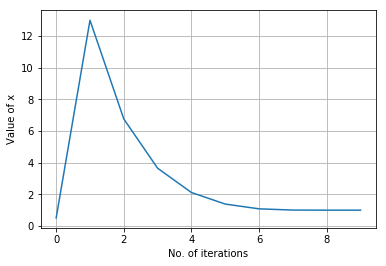

1.0000000012719288


,x(n),f(x(n)),f'(x(n)),x(n+1),x(n+1)-x(n)
0,0.510000,-0.249900,0.020000,13.005000,12.495000
1,13.005000,156.125025,25.010000,6.762496,-6.242504
2,6.762496,38.968856,12.524992,3.651208,-3.111288
3,3.651208,9.680112,6.302416,2.115271,-1.535937
4,2.115271,2.359102,3.230543,1.385022,-0.730249
5,1.385022,0.533264,1.770044,1.083750,-0.301272
6,1.083750,0.090765,1.167501,1.006008,-0.077743
7,1.006008,0.006044,1.012016,1.000036,-0.005972
8,1.000036,0.000036,1.000071,1.000000,-0.000036
9,1.000036,0.000036,1.000071,1.000000,-0.000036


In [53]:
table , arr , answer = newton_raphson(0.51,0.0001,13)
iterations(arr,'13_1')
print(answer)
table

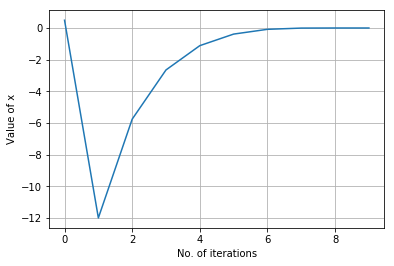

-1.2719288349747086e-09


,x(n),f(x(n)),f'(x(n)),x(n+1),x(n+1)-x(n)
0,0.490000,0.249900,0.020000,-1.200500e+01,-12.495000
1,-12.005000,-156.125025,25.010000,-5.762496e+00,6.242504
2,-5.762496,-38.968856,12.524992,-2.651208e+00,3.111288
3,-2.651208,-9.680112,6.302416,-1.115271e+00,1.535937
4,-1.115271,-2.359102,3.230543,-3.850221e-01,0.730249
5,-0.385022,-0.533264,1.770044,-8.375045e-02,0.301272
6,-0.083750,-0.090765,1.167501,-6.007822e-03,0.077743
7,-0.006008,-0.006044,1.012016,-3.566538e-05,0.005972
8,-0.000036,-0.000036,1.000071,-1.271929e-09,0.000036
9,-0.000036,-0.000036,1.000071,-1.271929e-09,0.000036


In [54]:
table , arr , answer = newton_raphson(0.49,0.0001,12)
iterations(arr,'12_2')
print(answer)
table

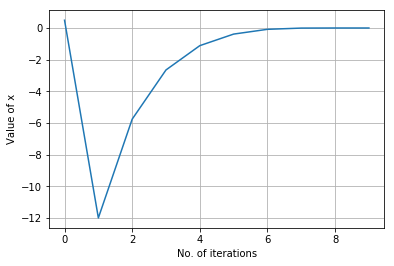

-1.2719288349747086e-09


,x(n),f(x(n)),f'(x(n)),x(n+1),x(n+1)-x(n)
0,0.490000,-0.249900,-0.020000,-1.200500e+01,-12.495000
1,-12.005000,156.125025,-25.010000,-5.762496e+00,6.242504
2,-5.762496,38.968856,-12.524992,-2.651208e+00,3.111288
3,-2.651208,9.680112,-6.302416,-1.115271e+00,1.535937
4,-1.115271,2.359102,-3.230543,-3.850221e-01,0.730249
5,-0.385022,0.533264,-1.770044,-8.375045e-02,0.301272
6,-0.083750,0.090765,-1.167501,-6.007822e-03,0.077743
7,-0.006008,0.006044,-1.012016,-3.566538e-05,0.005972
8,-0.000036,0.000036,-1.000071,-1.271929e-09,0.000036
9,-0.000036,0.000036,-1.000071,-1.271929e-09,0.000036


In [55]:
table , arr , answer = newton_raphson(0.49,0.0001,13)
iterations(arr,'13_2')
print(answer)
table

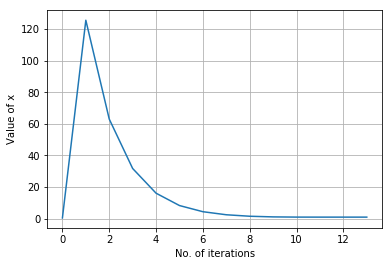

1.000000000000006


,x(n),f(x(n)),f'(x(n)),x(n+1),x(n+1)-x(n)
0,0.501000,2.499990e-01,-0.002000,125.500500,1.249995e+02
1,125.500500,-1.562488e+04,-250.001000,63.001250,-6.249925e+01
2,63.001250,-3.906156e+03,-125.002500,31.752625,-3.124863e+01
3,31.752625,-9.764766e+02,-62.505250,16.130312,-1.562231e+01
4,16.130312,-2.440567e+02,-31.260624,8.323153,-7.807159e+00
5,8.323153,-6.095173e+01,-15.646307,4.427555,-3.895598e+00
6,4.427555,-1.517569e+01,-7.855110,2.495604,-1.931951e+00
7,2.495604,-3.732435e+00,-3.991208,1.560440,-9.351642e-01
8,1.560440,-8.745322e-01,-2.120879,1.148095,-4.123442e-01
9,1.148095,-1.700277e-01,-1.296191,1.016921,-1.311749e-01


In [56]:
table , arr , answer = newton_raphson(0.501,0.0001,12)
iterations(arr,'12_3')
print(answer)
table

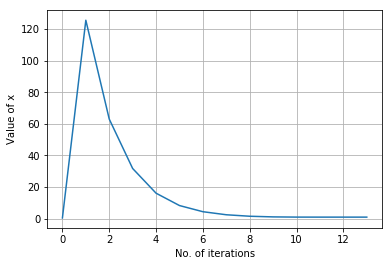

1.000000000000006


,x(n),f(x(n)),f'(x(n)),x(n+1),x(n+1)-x(n)
0,0.501000,-2.499990e-01,0.002000,125.500500,1.249995e+02
1,125.500500,1.562488e+04,250.001000,63.001250,-6.249925e+01
2,63.001250,3.906156e+03,125.002500,31.752625,-3.124863e+01
3,31.752625,9.764766e+02,62.505250,16.130312,-1.562231e+01
4,16.130312,2.440567e+02,31.260624,8.323153,-7.807159e+00
5,8.323153,6.095173e+01,15.646307,4.427555,-3.895598e+00
6,4.427555,1.517569e+01,7.855110,2.495604,-1.931951e+00
7,2.495604,3.732435e+00,3.991208,1.560440,-9.351642e-01
8,1.560440,8.745322e-01,2.120879,1.148095,-4.123442e-01
9,1.148095,1.700277e-01,1.296191,1.016921,-1.311749e-01


In [57]:
table , arr , answer = newton_raphson(0.501,0.0001,13)
iterations(arr,'13_3')
print(answer)
table

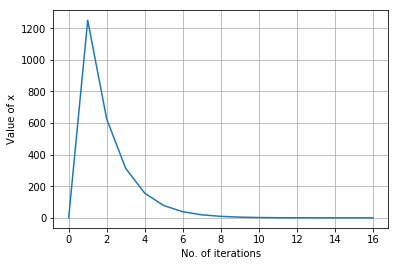

1.0000000000041231


,x(n),f(x(n)),f'(x(n)),x(n+1),x(n+1)-x(n)
0,0.500100,2.500000e-01,-0.000200,1250.500050,1249.999950
1,1250.500050,-1.562500e+06,-2500.000100,625.500125,-624.999925
2,625.500125,-3.906249e+05,-1250.000250,313.000262,-312.499863
3,313.000262,-9.765616e+04,-625.000525,156.750531,-156.249731
4,156.750531,-2.441398e+04,-312.501062,78.626066,-78.124466
5,78.626066,-6.103432e+03,-156.252131,39.564633,-39.061433
6,39.564633,-1.525796e+03,-78.129266,20.035516,-19.529117
7,20.035516,-3.813864e+02,-39.071032,10.274157,-9.761360
8,10.274157,-9.528414e+01,-19.548313,5.399867,-4.874290
9,5.399867,-2.375870e+01,-9.799734,2.975444,-2.424423


In [58]:
table , arr , answer = newton_raphson(0.5001,0.0001,12)
iterations(arr,'12_4')
print(answer)
table

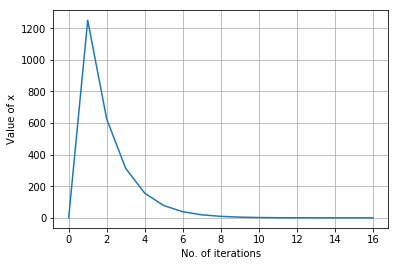

1.0000000000041231


,x(n),f(x(n)),f'(x(n)),x(n+1),x(n+1)-x(n)
0,0.500100,-2.500000e-01,0.000200,1250.500050,1249.999950
1,1250.500050,1.562500e+06,2500.000100,625.500125,-624.999925
2,625.500125,3.906249e+05,1250.000250,313.000262,-312.499863
3,313.000262,9.765616e+04,625.000525,156.750531,-156.249731
4,156.750531,2.441398e+04,312.501062,78.626066,-78.124466
5,78.626066,6.103432e+03,156.252131,39.564633,-39.061433
6,39.564633,1.525796e+03,78.129266,20.035516,-19.529117
7,20.035516,3.813864e+02,39.071032,10.274157,-9.761360
8,10.274157,9.528414e+01,19.548313,5.399867,-4.874290
9,5.399867,2.375870e+01,9.799734,2.975444,-2.424423


In [59]:
table , arr , answer = newton_raphson(0.5001,0.0001,13)
iterations(arr,'13_4')
print(answer)
table

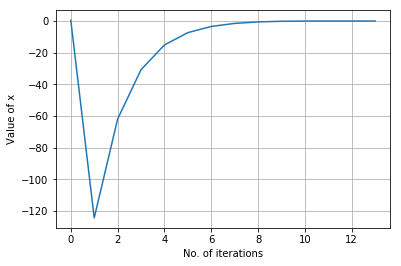

-5.8751565371183105e-15


,x(n),f(x(n)),f'(x(n)),x(n+1),x(n+1)-x(n)
0,4.990000e-01,2.499990e-01,0.002000,-1.245005e+02,-1.249995e+02
1,-1.245005e+02,-1.562488e+04,250.001000,-6.200125e+01,6.249925e+01
2,-6.200125e+01,-3.906156e+03,125.002500,-3.075262e+01,3.124863e+01
3,-3.075262e+01,-9.764766e+02,62.505250,-1.513031e+01,1.562231e+01
4,-1.513031e+01,-2.440567e+02,31.260624,-7.323153e+00,7.807159e+00
5,-7.323153e+00,-6.095173e+01,15.646307,-3.427555e+00,3.895598e+00
6,-3.427555e+00,-1.517569e+01,7.855110,-1.495604e+00,1.931951e+00
7,-1.495604e+00,-3.732435e+00,3.991208,-5.604396e-01,9.351642e-01
8,-5.604396e-01,-8.745322e-01,2.120879,-1.480954e-01,4.123442e-01
9,-1.480954e-01,-1.700277e-01,1.296191,-1.692055e-02,1.311749e-01


In [60]:
table , arr , answer = newton_raphson(0.499,0.0001,12)
iterations(arr,'12_5')
print(answer)
table

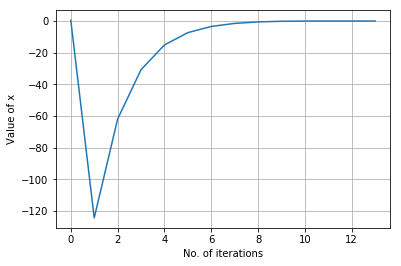

-5.8751565371183105e-15


,x(n),f(x(n)),f'(x(n)),x(n+1),x(n+1)-x(n)
0,4.990000e-01,-2.499990e-01,-0.002000,-1.245005e+02,-1.249995e+02
1,-1.245005e+02,1.562488e+04,-250.001000,-6.200125e+01,6.249925e+01
2,-6.200125e+01,3.906156e+03,-125.002500,-3.075262e+01,3.124863e+01
3,-3.075262e+01,9.764766e+02,-62.505250,-1.513031e+01,1.562231e+01
4,-1.513031e+01,2.440567e+02,-31.260624,-7.323153e+00,7.807159e+00
5,-7.323153e+00,6.095173e+01,-15.646307,-3.427555e+00,3.895598e+00
6,-3.427555e+00,1.517569e+01,-7.855110,-1.495604e+00,1.931951e+00
7,-1.495604e+00,3.732435e+00,-3.991208,-5.604396e-01,9.351642e-01
8,-5.604396e-01,8.745322e-01,-2.120879,-1.480954e-01,4.123442e-01
9,-1.480954e-01,1.700277e-01,-1.296191,-1.692055e-02,1.311749e-01


In [61]:
table , arr , answer = newton_raphson(0.499,0.0001,13)
iterations(arr,'13_5')
print(answer)
table

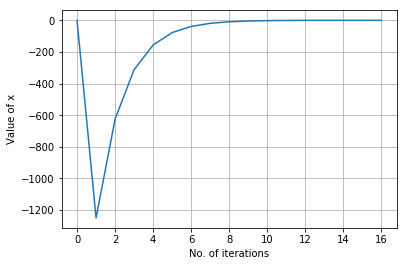

-4.123163738483927e-12


,x(n),f(x(n)),f'(x(n)),x(n+1),x(n+1)-x(n)
0,0.499900,2.500000e-01,0.000200,-1.249500e+03,-1249.999950
1,-1249.500050,-1.562500e+06,2500.000100,-6.245001e+02,624.999925
2,-624.500125,-3.906249e+05,1250.000250,-3.120003e+02,312.499863
3,-312.000262,-9.765616e+04,625.000525,-1.557505e+02,156.249731
4,-155.750531,-2.441398e+04,312.501062,-7.762607e+01,78.124466
5,-77.626066,-6.103432e+03,156.252131,-3.856463e+01,39.061433
6,-38.564633,-1.525796e+03,78.129266,-1.903552e+01,19.529117
7,-19.035516,-3.813864e+02,39.071032,-9.274157e+00,9.761360
8,-9.274157,-9.528414e+01,19.548313,-4.399867e+00,4.874290
9,-4.399867,-2.375870e+01,9.799734,-1.975444e+00,2.424423


In [62]:
table , arr , answer = newton_raphson(0.4999,0.0001,12)
iterations(arr,'12_6')
print(answer)
table

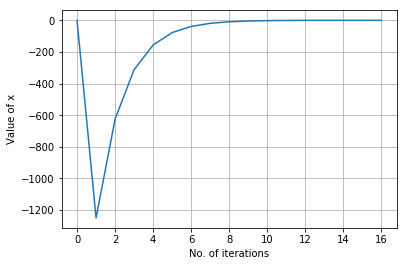

-4.123163738483927e-12


,x(n),f(x(n)),f'(x(n)),x(n+1),x(n+1)-x(n)
0,0.499900,-2.500000e-01,-0.000200,-1.249500e+03,-1249.999950
1,-1249.500050,1.562500e+06,-2500.000100,-6.245001e+02,624.999925
2,-624.500125,3.906249e+05,-1250.000250,-3.120003e+02,312.499863
3,-312.000262,9.765616e+04,-625.000525,-1.557505e+02,156.249731
4,-155.750531,2.441398e+04,-312.501062,-7.762607e+01,78.124466
5,-77.626066,6.103432e+03,-156.252131,-3.856463e+01,39.061433
6,-38.564633,1.525796e+03,-78.129266,-1.903552e+01,19.529117
7,-19.035516,3.813864e+02,-39.071032,-9.274157e+00,9.761360
8,-9.274157,9.528414e+01,-19.548313,-4.399867e+00,4.874290
9,-4.399867,2.375870e+01,-9.799734,-1.975444e+00,2.424423


In [63]:
table , arr , answer = newton_raphson(0.4999,0.0001,13)
iterations(arr,'13_6')
print(answer)
table

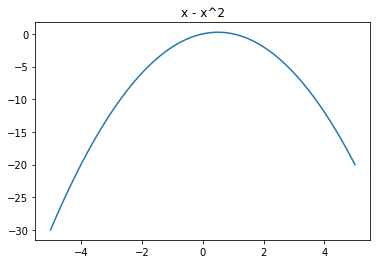

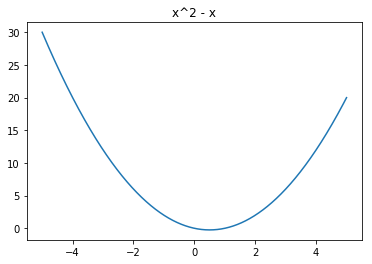

In [51]:
x = np.arange(-5, 5, 0.001)
plt.plot(x, function(x, 12))
plt.title('x - x^2')
plt.savefig('Graph12_1')
plt.show()
plt.plot(x, function(x, 13))
plt.title('x^2 - x')
plt.savefig('Graph13_1')
plt.show()

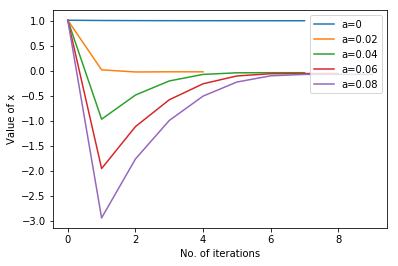

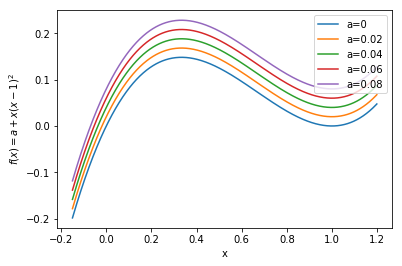

,a,Root
0,0.00,1.000079
1,0.02,-0.019252
2,0.04,-0.037183
3,0.06,-0.054009
4,0.08,-0.069890


In [64]:
def function1(a,x):
    return a + x*((x-1)**2);

def derivative1(x):
    return ((x-1)**2) + 2*(x-1)*x;

def newton_raphson1(a,initial_value,epsilon):
    table = pd.DataFrame(columns=['x(n)','f(x(n))','f\'(x(n))','x(n+1)','x(n+1)-x(n)'])
    i = 0
    func = function1(a,initial_value)
    der = derivative1(initial_value)
    new_value = initial_value - (func/der);
    arr = []
    arr.append(initial_value)
    while(True):
        if(abs(new_value - initial_value) < epsilon):
            break
        initial_value = new_value
        func = function1(a,initial_value)
        der = derivative1(initial_value)
        new_value = initial_value - (func/der);
        table.loc[i] = [initial_value,func,der,new_value,new_value-initial_value]
        i=i+1
        arr.append(initial_value)
    func = function1(a,initial_value)
    der = derivative1(initial_value)
    arr.append(initial_value)
    return arr, new_value, table

a = 0
roots = []

a_values = []
tables = []
for i in range(5):
    arr, answer, table = newton_raphson1(a,1.01,0.0001)
    plt.plot(range(len(arr)),arr,label='a=' + str(round(a,2)))
    roots.append(answer)
    a_values.append(a)
    a = a + 0.02
    tables.append(table)

plt.legend(loc='upper right')
plt.xlabel('No. of iterations')
plt.ylabel('Value of x')
plt.savefig("Question2_1.png")
plt.show()

a = 0

y = np.arange(-0.15,1.2,0.001)
for i in range(5):
    plt.plot(y,function1(a,y),label='a=' + str(round(a,2)))
    a=a+0.02

    
plt.legend(loc='upper right')
plt.xlabel('x')
plt.ylabel('$f(x) = a + x(x-1)^2$')
plt.savefig("Question2_2.png")
plt.show()

table = pd.DataFrame(columns=['a','Root']);

for i in range(len(roots)):
    table.loc[i] = [a_values[i], roots[i]]
table

In [68]:
tables[0]

,x(n),f(x(n)),f'(x(n)),x(n+1),x(n+1)-x(n)
0,1.005025,2.537377e-05,0.010125,1.002519,-0.002506
1,1.002519,6.359220e-06,0.005056,1.001261,-0.001258
2,1.001261,1.591797e-06,0.002527,1.000631,-0.000630
3,1.000631,3.981995e-07,0.001263,1.000316,-0.000315
4,1.000316,9.958124e-08,0.000631,1.000158,-0.000158
5,1.000158,2.489923e-08,0.000316,1.000079,-0.000079


In [69]:
tables[1]

,x(n),f(x(n)),f'(x(n)),x(n+1),x(n+1)-x(n)
0,0.019803,0.039026,0.921965,-0.022527,-0.042330
1,-0.022527,-0.003553,1.091629,-0.019272,0.003255
2,-0.019272,-0.000022,1.078202,-0.019252,0.000020


In [70]:
tables[2]

,x(n),f(x(n)),f'(x(n)),x(n+1),x(n+1)-x(n)
0,-0.965419,-3.689288,7.657775,-0.483649,0.481770
1,-0.483649,-1.024613,3.636342,-0.201878,0.281770
2,-0.201878,-0.251615,1.929777,-0.071492,0.130386
3,-0.071492,-0.042080,1.301304,-0.039155,0.032337
4,-0.039155,-0.002282,1.161221,-0.037190,0.001965
5,-0.037190,-0.000008,1.152911,-0.037183,0.000007


In [71]:
tables[3]

,x(n),f(x(n)),f'(x(n)),x(n+1),x(n+1)-x(n)
0,-1.950640,-16.922819,20.217555,-1.113605,0.837036
1,-1.113605,-4.914832,9.174763,-0.577914,0.535690
2,-0.577914,-1.378898,4.313611,-0.258252,0.319662
3,-0.258252,-0.348864,2.233090,-0.102027,0.156225
4,-0.102027,-0.063908,1.439337,-0.057626,0.044401
5,-0.057626,-0.004459,1.240466,-0.054031,0.003594
6,-0.054031,-0.000028,1.224884,-0.054009,0.000023


In [72]:
tables[4]

,x(n),f(x(n)),f'(x(n)),x(n+1),x(n+1)-x(n)
0,-2.935862,-45.399469,38.601307,-1.759750,1.176112
1,-1.759750,-13.322640,17.329158,-0.990951,0.768799
2,-0.990951,-3.848015,7.909753,-0.504461,0.486490
3,-0.504461,-1.061798,3.781286,-0.223657,0.280803
4,-0.223657,-0.254891,2.044698,-0.098998,0.124659
5,-0.098998,-0.039570,1.425394,-0.071238,0.027760
6,-0.071238,-0.001749,1.300175,-0.069893,0.001345
7,-0.069893,-0.000004,1.294225,-0.069890,0.000003
